# Анализ поведения покупателей и оптимизация маркетинговых затрат

**Цель проекта:** изучить взаимодействие пользователя с нашим продуктом и оптимизировать маркетинговые затраты, а также выбрать важные метрики для развития ресурса на следующий год.

**Задачи проекта:** 
- определить и описать как люди пользуются нашим продуктом
- определить когда пользователь начинает покупать наш продукт
- посчитать какую прибыль приносит каждый клиент
- рассчитать за какой период клиент окупается
- на основе полученных данных, дать рекомендации для оптимизации маркетинговых затрат

**Описание данных:** у нас в распоряжении данные сервиса для продажи билетов на мероприятия в городе с июня 2017 по конец мая 2018 года, где содержится информация о визитах, заказах и расходах:
- лог сервера с данными о посещениях сервиса — **/datasets/visits_log.csv**
- выгрузка всех заказов за этот период — **/datasets/orders_log.csv**
- статистика рекламных расходов — **/datasets/costs.csv**

#### Содержание наборов данных:

Таблица **visits** (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь


Таблица **orders** (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка сервиса с этого заказа


Таблица **costs** (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

#### План анализа:
- Обзор и подготовка данных (анализ и обработка ошибок).
- Провести исследовательский анализ данных (анализ продукта, продаж и маркетинга)
- Построить отчёты и посчитать метрики
- Построить графики для отображения метрик и их изменений. 
- Итоговый вывод и рекомендации для маркетологов (какие источники и платформы выбрать для дальнейшего продвижения)

### Оглавление

1. [Обзор и подготовка данных](#one) </n>
2. [Исследовательский анализ данных](#two)
 - [Анализ данных о продукте](#three)
 - [Анализ данных о продажах](#four)
 - [Анализ данных о затратах на маркетинг](#five)


3. [Итоговый вывод](#six)

---

# <a id="one"> Обзор и подготовка данных</a>

### Оглавление части

1. [Лог сервера с данными о посещениях сайта](#seven) </n>
2. [Выгрузка всех заказов за выбранный период](#eight)
3. [Cтатистика рекламных расходов](#nine)

In [1]:
#импорт библиотек
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

#сохраняем таблицы в переменных
visits_log = pd.read_csv('/datasets/visits_log.csv')
orders_log = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

## <a id="seven"> Лог сервера с данными о посещениях сайта</a>

In [2]:
visits_log.info()
visits_log.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [3]:
#поиск пропусков
visits_log.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [4]:
#поиск дубликатов
visits_log.duplicated().sum()

0

In [5]:
#ищем количество уникальных пользователей
visits_log['Uid'].value_counts()

12869801667763685675    893
3263486045884611639     615
11255648391090536411    551
17030528792926543083    357
8056418121947262981     343
                       ... 
13023238853810096243      1
13275209559615110952      1
10451189761655280393      1
11370115024582961201      1
15160524768967727475      1
Name: Uid, Length: 228169, dtype: int64

### Комментарий

Названия столбцов записаны с большой буквы, возможно будет лучше исправить их. Для этого приведем их к нижнему регистру и заменим пробелы на нижнее подчеркивание, чтобы избежать ошибок. Пропусков нет, дубликатов по целым строкам нет.

Стобцы, где указана дата должны иметь тип данных datetime, а сейчас они имеют тип object, нужно исправить для упрощения подсчетов. Столбец Device скорее всего будет лучше изменить на str, но пока оставим как есть — поменяем если будет необходимо. То же касается и остальных столбцов — будем менять при необхожимости.

В таблице всего 359400 строк, из них уникальных пользователей 228169.

In [6]:
#исправим названия столбцов
visits_log.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [7]:
#исправим типа данных для столбцов с датами
visits_log['start_ts'] = pd.to_datetime(visits_log['start_ts'], format='%Y.%m.%d %H:%M:%S')
visits_log['end_ts'] = pd.to_datetime(visits_log['end_ts'], format='%Y.%m.%d %H:%M:%S')

---

## <a id="eight"> Выгрузка всех заказов за выбранный период</a> 

In [8]:
orders_log.info()
orders_log.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [9]:
orders_log.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [10]:
orders_log.duplicated().sum()

0

### Комментарий

Названия столбцов поменяем как и в предыдущей таблице, пропусков нет, дубликатов по целым строкам тоже нет. Столбец Revenue я предлагаю оставить с типом float, так как цифры после запятой могут иметь решающее значение. 

Также нам не указали в какой валюте указана прибыль, так что предположим, что расчет в тысячах — те, кто предоставил нам данные знают в какой валюте и в каких единицах исчисляется выручка, так что это не повлияет на результат. Просто обозначим так для удобства.

In [11]:
#исправим названия столбцов
orders_log.columns = ['buy_ts', 'revenue', 'uid']

In [12]:
#исправим типа данных для столбцов с датами
orders_log['buy_ts'] = pd.to_datetime(orders_log['buy_ts'], format='%Y.%m.%d %H:%M:%S')

---

## <a id="nine"> Cтатистика рекламных расходов</a>

In [13]:
costs.info()
costs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


In [14]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [15]:
costs.duplicated().sum()

0

### Комментарий

Столбец с датой тоже имеет неправильный тип. Возможно стоит передать эту информацию коллегам, чтобы данные сразу собирались в нужном типе. Пропусков нет, дубликатов по столбцам тоже.

In [16]:
#исправим типа данных для столбцов с датами
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y.%m.%d %H:%M:%S')

## Промежуточный вывод

В целом данные в порядке. Основная проблема с типами данных, так как все даты не имеют правильный тип для рассчетов, а числовые значения часто имеют тип данных object. Об этом стоит сообщить коллегам.

----

# <a id="two">Исследовательский анализ данных</a>

# <a id="three"> Анализ данных о продукте</a>

#### Оглавление части

1. [Сколько людей пользуются в день, неделю, месяц?](#step1) </n>
2. [Сколько сессий в день?](#step2)
3. [Сколько длится одна сессия?](#step3)
4. [Как часто люди возвращаются?](#step4)

Посмотрим на детали работы нашего продукта, чтобы ответить на несколько вопросов:
- Сколько людей пользуются в день, неделю, месяц?
- Сколько сессий в день?
- Сколько длится одна сессия?
- Как часто люди возвращаются?

Наш продукт — сервис по продаже билетов на мероприятия в городе. Это русскоязычный сервис, он помогает пользователям узнать о последних новостях киноиндустрии и событиях в городе, а также заказать билеты прямо на сайте.

Для ответа на вопрос возьмем для анализа таблицу visits_log.

### <a id="step1"> Сколько людей пользуются ресурсом в день, неделю, месяц?</a>

In [17]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [18]:
#добавим столбцы с месяцем, неделей и днем сессии
visits_log['year_ts']  = visits_log['start_ts'].dt.year
visits_log['month_ts'] = visits_log['start_ts'].dt.month
visits_log['week_ts'] = visits_log['start_ts'].dt.week

#для столбца с днями округлим дату до дня — так в рассчет попадет каждый календарный день, а не просто число дня
visits_log['day_ts'] = visits_log['start_ts'].dt.round('1D')
visits_log.head()

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,day_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-21
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-20
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-28


In [19]:
#сгруппируем сессии по месяцам, считая только уникальные значения uid
month_visits = visits_log.groupby('month_ts').agg({'uid': 'nunique'})
month_visits.describe()

,uid
count,12.000000
mean,23228.416667
std,7546.380462
min,11631.000000
25%,17777.000000
50%,24240.500000
75%,28984.750000
max,32797.000000


In [20]:
#сгруппируем сессии по неделям, считая только уникальные значения uid
week_visits = visits_log.groupby(['year_ts', 'week_ts']).agg({'uid': 'nunique'})
week_visits.describe()

,uid
count,53.000000
mean,5716.245283
std,2049.898027
min,2021.000000
25%,4128.000000
50%,5740.000000
75%,7401.000000
max,10586.000000


In [21]:
#сгруппируем сессии по дням, считая только уникальные значения uid
day_visits = visits_log.groupby('day_ts').agg({'uid': 'nunique'})
day_visits.describe()

,uid
count,364.000000
mean,911.755495
std,362.004441
min,1.000000
25%,593.750000
50%,945.000000
75%,1170.500000
max,2851.000000


Посчитаем метрику sticky factor, чтобы посчитать регулярность использования нашего ресурса — то, как часто пользователи к нему обращаются.

In [22]:
sticky_factor_month = int(day_visits.mean())/int(month_visits.mean())*100
sticky_factor_week = int(day_visits.mean())/int(week_visits.mean())*100

display(sticky_factor_week)
display(sticky_factor_month)

15.93771868439468

3.92199070087825

### Комментарий

В среднем:
- в месяц заходят 23228 уникальных пользователей
- в неделю 5716 уникальных пользователей
- в день 911 уникальных пользователей

Sticky factor:
- по отношению к месячной аудитории — 3.9
- по отношению к недельной аудитории — 15.9

При этом минимальные и максимальные показатели довольно значительно отличаются от среднего — посмотрим на графике, чтобы понять как они распределены.

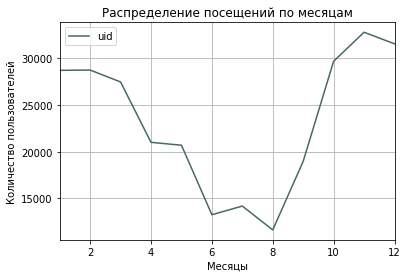

In [23]:
month_visits.plot(color='#466667', grid=True)

plt.title('Распределение посещений по месяцам')
plt.xlabel('Месяцы')
plt.ylabel('Количество пользователей')
plt.show();

### Комментарий

В январе количество пользователей около 28 тысяч, но количество значительно снижается в июле примерно до 14000 и держится на низких показателях все лето. С сентября количество пользователей растет. Вероятно это сезонные изменения, хотя казалось, что летом люди должны больше интересоваться событиями в городе. Возможно это связано с тем, что летом многие уезжают на отдых из страны.

Построим также распределение метрики WAU — как менялись показатели во времени в разбивке по неделям.

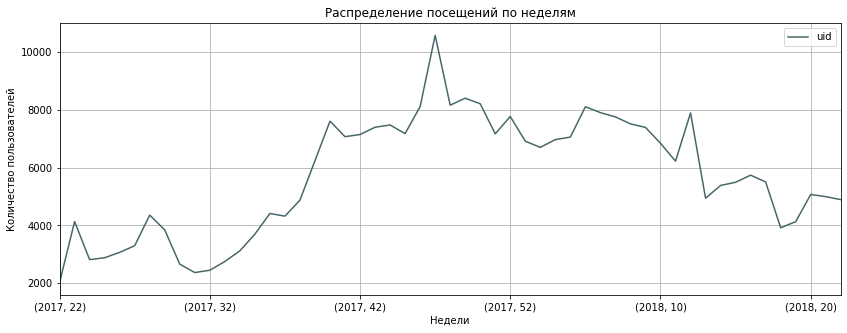

In [24]:
week_visits.plot(color='#466667', grid=True, figsize=(14, 5))

plt.title('Распределение посещений по неделям')
plt.xlabel('Недели')
plt.ylabel('Количество пользователей')
plt.show();

### Комментарий

Максимальный показатель за неделю составил больше 10 тысяч посещений — осенью 2017 года. Можно спросить у коллег что произошло в эту неделю, чтобы понять откуда такие показатели. При этом можно отметить, что в 2018 году показатели начали значительно снижаться и по последним данным видно, что посещаемость достигла уровня середины 2017 года — меньше 6000 посещений.

Распределение по дням будет лучше посмотреть за последний месяц, чтобы отметить есть ли скачки в течение недели.

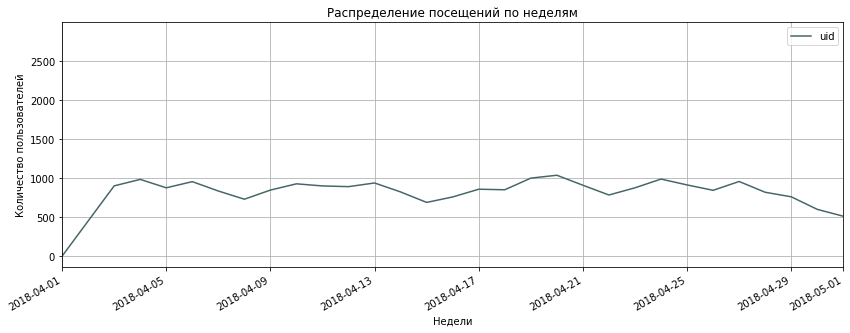

In [25]:
day_visits.plot(color='#466667', grid=True, figsize=(14, 5), xlim=('2018-04','2018-05'))

plt.title('Распределение посещений по неделям')
plt.xlabel('Недели')
plt.ylabel('Количество пользователей')
plt.show();

### Комментарий

Мы видим, что в течение недель нет закономерных изменений. Часть недель имеет падения до середины недели, а часть рост. В целом показатели за неделю редко превышали 1000 посещений. Чаще всего они были в диапазон от 500 до 1000.

---

### <a id="step2"> Сколько сессий в день?</a>

In [26]:
visits_log.head()

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,day_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-21
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-20
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-28


In [27]:
#посчитаем количество сессий в группировке по столбцу day_ts
day_session = visits_log.groupby('day_ts').agg({'start_ts': 'count'}).describe()

### Комментарий

Среднее количество сессий — 987, но при этом есть минимальное количество 1 и максимально 3510. Было бы неплохо посмотреть как они распределены.

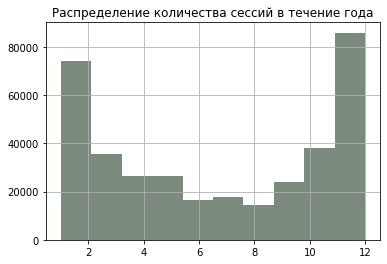

In [28]:
visits_log.hist('month_ts', color='#7A8A7D')

plt.title('Распределение количества сессий в течение года')
plt.show;

In [29]:
#средний показатель метрики DAU
day_visits.mean()

uid    911.755495
dtype: float64

### Комментарий

Количество сессий уменьшается с января и начинает расти в сентябре, также как и количество посетителей. Вероятно это естественные сезонные изменения. Если мы разделим показатель среднего количества сессий на метрику DAU, то получим результат 1.08 — значит в среднем на пользователя приходится 1.08 сессий.

---

### <a id="step3"> Сколько длится одна сессия?</a>

Продолжительность сессии или ASL показывает, сколько длится сессия одного пользователя в среднем.

Вычтем старт сессии из окончания сессии, чтобы получить продолжительность каждой сессии в секундах.

In [30]:
visits_log['session_duration'] = (visits_log['end_ts'] - visits_log['start_ts']).dt.total_seconds()
visits_log.head()

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,day_ts,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-21,1080.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-20,1680.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-28,0.0


In [31]:
#посмотрим статистические показатели
visits_log['session_duration'].describe()

count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration, dtype: float64

In [32]:
visits_log[visits_log['session_duration'] < 0]

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,day_ts,session_duration
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986,2018,3,12,2018-03-25,-1920.0
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453,2018,3,12,2018-03-25,-2760.0


In [33]:
visits_log[visits_log['session_duration'] > 0]['session_duration'].describe()

count    323604.000000
mean        714.169516
std        1026.349417
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       42660.000000
Name: session_duration, dtype: float64

Минимальное значение отрицательно, значит где-то в данных вероятно есть ошибка — дата окончания сессии не может быть раньше, чем начало сессии. Таких значений в таблице два — вероятно это ошибка в данных. Если посмотреть на статистические показатели без двух этих строк, то показатели немного меняются — длительность средней сессии 714 секунд, около 12 минут — это неплохой показатель, но посмотрим на распределение.

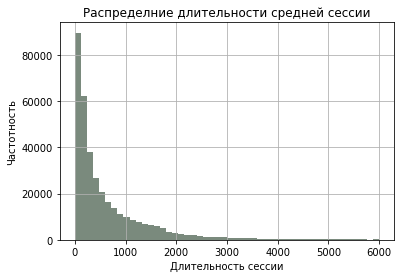

In [34]:
#построим распределение
visits_log['session_duration'].plot(kind='hist', bins=50, color='#7A8A7D', range=(0,6000), grid=True)

plt.title('Распределние длительности средней сессии')
plt.xlabel('Длительность сессии')
plt.ylabel('Частотность')
plt.show();

Наше распределение не близко к нормальному, поэтому рассчитаем моду — значение в выборке, которое встречается чаще всего.

In [35]:
visits_log['session_duration'].mode()

0    60.0
dtype: float64

### Комментарий

Чаще всего сессия занимает 60 секунд, что для сессии на сайте мало, поэтому надо разобраться из-за чего такой показатель мог появиться. За это время пользователь может максимум пролистать главную страницу.

Оценим эти же данные, но для каждого устройства отдельно, так как часто сессия бывает слишком короткой из-за неполадок в мобильной версии сайта.

In [37]:
display(visits_log.query('device == "touch"')['session_duration'].mode())
display(visits_log.query('device == "desktop"')['session_duration'].mode())

0    60.0
dtype: float64

0    60.0
dtype: float64

In [38]:
display(visits_log.query('device == "touch"')['session_duration'].mean())
display(visits_log.query('device == "desktop"')['session_duration'].mean())

479.6194066072517

703.2888596053579

### Комментарий

Чаще всего встречается значение сессии 60 на обоих устройствах, значит разницы нет. При это есть разница в средних значениях — на компьютерах сайт просматривают в среднем дольше, чем с мобильной версии.

---

### <a id="step4"> Как часто люди возвращаются?</a>

Чтобы определить этот показатель, нам понадобится метрика Retention Rate. Найдем ее.

In [39]:
#найдем дату, первой сесиия каждого пользователя
first_session_date = visits_log.groupby(['uid'])['start_ts'].min()
first_session_date.name = 'first_session_date'

#добавим столбец, где будет указана дата первой сесии для каждого пользователя
visits_log = visits_log.merge(first_session_date,on='uid', how='left')

In [40]:
#выделим из столбцов first_session_date и session_month месяцы
visits_log['first_session_month'] = visits_log['first_session_date'].astype('datetime64[M]')
visits_log['session_month'] = visits_log['start_ts'].astype('datetime64[M]')

In [41]:
#найдем разницу между сессией и первой сессией
visits_log['cohort_lifetime'] = visits_log['session_month'] - visits_log['first_session_month']

#преобразуем этот тип в число месяцев, прошедших между датами.
#узнаем сколько величин длиной в 1 месяц содержится в cohort_lifetime.
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'] / np.timedelta64(1,'M')
visits_log['cohort_lifetime'] = visits_log['cohort_lifetime'].round().astype('int')

In [42]:
#сгруппируем по месяцу первой сессии и cohort_lifetime
cohorts = visits_log.groupby(['first_session_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

#найдем первоначальное количество пользователей в каждой когорте
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_session_month','uid']]
initial_users_count.columns = ['first_session_month', 'cohort_users']

cohorts = cohorts.merge(initial_users_count,on='first_session_month')


cohorts['first_session_month'] = cohorts['first_session_month'].dt.strftime('%Y-%m-%d')

#найдем Retention Rate 
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
retention_pivot = cohorts.pivot_table(index='first_session_month',columns='cohort_lifetime',values='retention',
                                      aggfunc='sum')

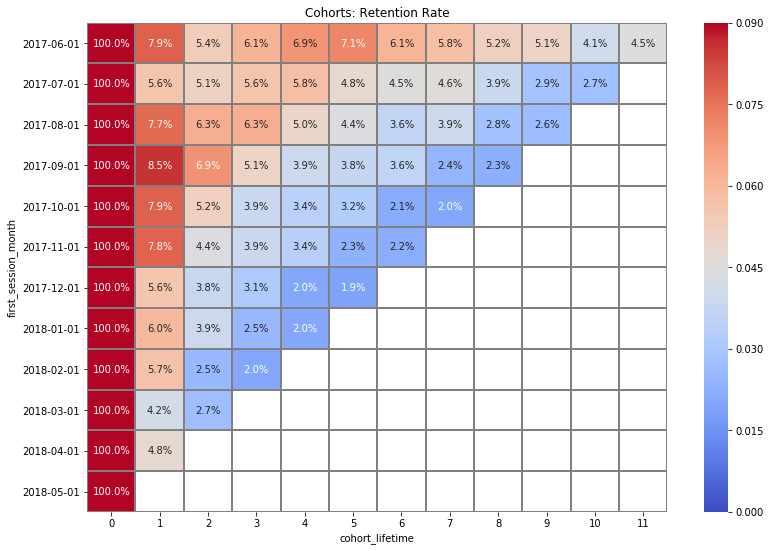

In [43]:
#построим тепловую карту для наглядности
plt.figure(figsize=(13, 9))
plt.title('Cohorts: Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap= 'coolwarm', 
            vmin=0, vmax=0.09);

### Комментарий

Retention Rate показывает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды. В целом процент возвратившихся пользователей довольно мал — меньше 10 процентов пользователей возвращаются на сайт повторно. Возможно это потому, что сайтом пользуются для конкретных задач — заказать билеты, а стабильно к нему возвращается небольшое количество людей. 

Это может значить, что после первого посещения пользователь отмечает для себя, что на этом сайте можно заказать билеты, но при этом он не возвращается к нему без конкретной цели покупки. Значит пользователь редко приходит на сайт для того, чтобы просто ознакомиться с новостями и не обращается к сайту как к периодическому изданию. Возможно стоит улучшить этот показатель, так как постоянные читатели могут чаще пользоваться прямым продуктом — покупкой билетов.

На нашей карте мы видим, что со временем процент снижается, но при этом показатель довольно стабильный в первые месяцы в одной когорте. 

Если для когорты пользователей, пришедших с 1 июня по 1 июля Retention Rate в первый месяц составляет 7,9%, то для пользователей, пришедших с 1 декабря по 1 января — уже 5,6%. Так, за 6 месяцев коэффициент удержания упал на 2,3% (это примерно 30% общего числа). Поведение пользователей меняется с каждой новой когортой. Нужно разобраться в чем могла быть причины — возможно выбраны неэффективные источники трафика или изменился интерфейс.

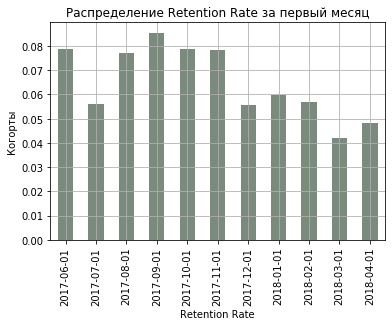

In [44]:
#построим распределение по первому месяцу, так как он самый показательный
cohorts_lifetime_1 = cohorts.query('cohort_lifetime == 1').pivot_table(index='first_session_month', 
                                                                       columns='cohort_lifetime',
                                                                       values='retention', 
                                                                       aggfunc='sum')
cohorts_lifetime_1[1].plot(kind='bar', color='#7A8A7D', grid=True)

plt.title('Распределение Retention Rate за первый месяц')
plt.xlabel('Retention Rate')
plt.ylabel('Когорты')
plt.show();

### Комментарий

Нам важно отметить изменение Retention Rate в этот месяц в зависимости от когорт и оценить как изменяется Retention Rate с течением времен. Можно отметить, что чем моложе когорта — тем меньше показатель Retention Rate. Это может значить, что чем дольше когорта пользуется ресурсом, тем больше пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

## Промежуточный вывод

Благодаря первым двум вопросам, мы выяснили, что в среднем показатели для ресурса очень хорошие — в месяц заходят 23228 уникальных пользователей. При этом на распределении легко заметить изменения в разные месяцы: с января по июнь показатели снижаются, а в сентябре начинают расти. В летние месяцы самые низкие показатели.

Длительность средней сессии 714 секунд, около 12 минут, но чаще всего встречается продолжительность 60 секунду, что мало для посещения ресурса. Нет разницы в разбивке по виду устройства. Нужно передать информацию коллегам, чтобы понять в чем могла быть причина.

Метрика Retention Rate показала, что после первого посещения повторно приходят меньше 10% пользователей. При этом со временем показатели снижаются — новые когорты показывают, что повторно приходят меньше 6% пользователей. Возможно изменились источники трафика или был введен новый интерфейс.

Также я бы посоветовала коллегам изучить данные и попробовать изменить стратегию, чтобы увеличить количество повторных посещений. 

----

# <a id="four"> Анализ данных о продажах</a>

### Оглавление части

1. [Когда люди начинают покупать?](#step6) </n>
2. [Сколько раз покупают за период?](#step7)
3. [Какой средний чек?](#step8)
4. [Сколько денег приносят? (LTV)](#step9)

Проанализируем данные о продажах и ответим на вопросы:
- Когда люди начинают покупать?
- Сколько раз покупают за период?
- Какой средний чек?
- Сколько денег приносят? (LTV)

In [47]:
orders_log.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


### <a id="step6"> Когда люди начинают покупать?</a>

Чтобы найти количество дней от посещениях до покупки, мы можем объединить таблицы с визитами и покупками. Так мы получим дату первого визита и дату первой покупки. Мне кажется, что будет правильно считать именно так — сколько дней прошло между первым посещением сайта и первой покупкой. То есть, сколько дней понадобилось пользователю, чтобы после знакомства с платформой совершить первую покупку.

In [48]:
#оставим только нужные столбцы и объединим таблицы с визитами и покупками
visits_start_session = visits_log[['uid', 'start_ts']].set_index('uid')
orders_index_uid = orders_log[['buy_ts', 'uid']].set_index('uid')
buyers = orders_index_uid.join(visits_start_session)
buyers = buyers.reset_index()

In [49]:
#найдем дату первого посещения для каждого пользователя
min_start_session = buyers.groupby(['uid'])['start_ts'].min()
min_start_session.name = 'min_start_session'
buyers = buyers.merge(min_start_session,on='uid', how='left')

#найдем дату первой покупки для каждого пользователя
min_buy_session = buyers.groupby(['uid'])['buy_ts'].min()
min_buy_session.name = 'min_buy_session'
buyers = buyers.merge(min_buy_session,on='uid', how='left')

#оставим только нужные столбцы
buyers = buyers[['uid', 'min_start_session', 'min_buy_session']]

#из-за такого объединения появились дубликаты — данные об одном пользователе, которые содержат одни и те же даты
#удалим дубликаты: это облегчит таблицу и оставит достаточно данных для анализа
buyers = buyers.drop_duplicates()

In [50]:
#посчитаем разницу между датой первого посещения и датой первой покупки
buyers['time_to_buy'] = buyers['min_buy_session'] - buyers['min_start_session']
buyers['time_to_buy'] = buyers['time_to_buy'] / np.timedelta64(1,'D')
buyers['time_to_buy'] = buyers['time_to_buy'].round().astype('int')

buyers.head(10)

,uid,min_start_session,min_buy_session,time_to_buy
0,9223707061355654945,2017-10-31 22:36:00,2017-10-31 22:56:00,0
2,9224005701666002943,2017-12-26 11:11:00,2017-12-26 11:15:00,0
6,9225406053864431006,2017-09-28 18:47:00,2017-12-28 16:29:00,91
9,9225479525411867039,2018-02-25 16:46:00,2018-02-25 16:54:00,0
10,9225594012261502815,2017-07-17 09:20:00,2017-07-17 10:39:00,0
14,9225769845961911267,2017-09-25 21:21:00,2017-09-25 21:26:00,0
15,9226362944924270642,2018-05-13 11:15:00,2018-05-13 11:17:00,0
16,9226489370443240988,2017-09-21 01:23:00,2017-09-21 01:23:00,0
18,9226701148503077660,2017-11-26 12:31:00,2017-11-26 12:37:00,0
19,9227412908740601561,2017-06-04 09:50:00,2017-06-04 09:50:00,0


In [51]:
#найдем среднее значение
buyers['time_to_buy'].describe()

count    36523.000000
mean        16.893656
std         47.075936
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_buy, dtype: float64

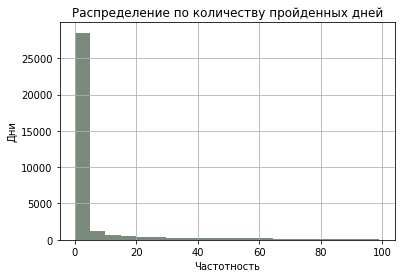

In [52]:
#построим распределение
buyers.query('time_to_buy < 100')['time_to_buy'].hist(bins=20, color='#7A8A7D')

plt.title('Распределение по количеству пройденных дней')
plt.xlabel('Частотность')
plt.ylabel('Дни')
plt.show();

In [53]:
#посмотрим сколько дней занимает решение о покупке чаще всего
buyers['time_to_buy'].value_counts().head(10)

0    25217
1     1779
2      671
3      504
4      351
5      314
6      266
7      231
8      220
9      161
Name: time_to_buy, dtype: int64

In [54]:
#сколько пользователей приняли решение о покупке меньше, чем за 10 дней
buyers.query('time_to_buy <= 10')['time_to_buy'].count()

29847

### Комментарий

В среднем пользователю требуется 16 дней на то, чтобы совершить покупку после первого посещения, однако если мы посмотрим, какие значение встречаются чаще всего, то мы увидим, что большинству требуется намного меньше дней на покупку. Это количество кажется слишком большим, так что проверим данные в разбивке по минутам.

### Когда люди начинают покупать (в разбивке минутам)?

В разбивке по минутам можно найти необычные закономерности и ошибки, так что проверим результаты. Секунды во времени сессий не указаны, так что разбивать срок на секунды нет смысла. Посчитаем в разбивке по минутам.

In [55]:
#посчитаем разницу между датой первого посещения и датой первой покупки в секундах
buyers['time_to_buy_minute'] = buyers['min_buy_session'] - buyers['min_start_session']
buyers['time_to_buy_minute'] = buyers['time_to_buy_minute'] / np.timedelta64(1,'m')
buyers['time_to_buy_minute'] = buyers['time_to_buy_minute'].round().astype('int')

#buyers[buyers['time_to_buy_minute'] == 0]   #2455
#buyers['time_to_buy_minute'].mode()         #1 минута
#buyers[buyers['time_to_buy_minute'] == 1]  #2656 значений
buyers['time_to_buy_minute'].describe()

count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_to_buy_minute, dtype: float64

In [56]:
#слева указано время от посещения до покупки в секундах, справа количество сессий
buyers['time_to_buy_minute'].value_counts().head(10)

1    2656
0    2455
2    2098
3    1685
4    1460
5    1204
6    1077
7     970
8     793
9     742
Name: time_to_buy_minute, dtype: int64

In [57]:
#сколько сессий заняло одну минуту
buyers.query('time_to_buy_minute == 1')['min_start_session'].count()

2656

In [58]:
#сколько сессий заняло больше одних суток
buyers.query('time_to_buy_minute > 1440')['min_start_session'].count()

10156

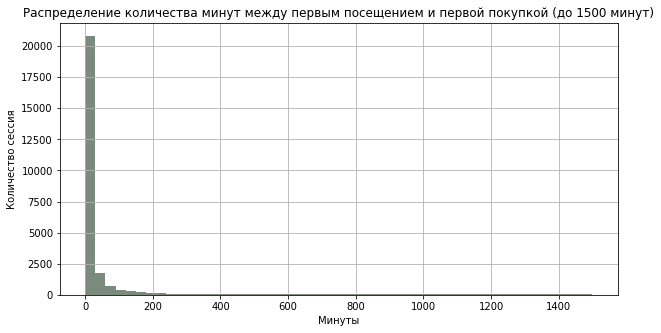

In [59]:
buyers['time_to_buy_minute'].hist(bins=50, range=(0, 1500), figsize=(10,5), color='#7A8A7D')

plt.title('Распределение количества минут между первым посещением и первой покупкой (до 1500 минут)')
plt.xlabel('Минуты')
plt.ylabel('Количество сессия')
plt.show();

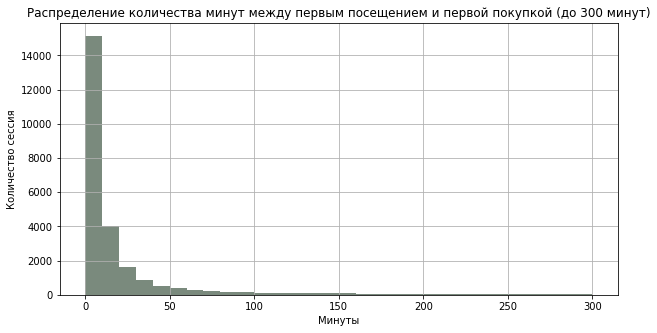

In [60]:
buyers['time_to_buy_minute'].hist(bins=30, range=(0, 300), figsize=(10,5), color='#7A8A7D')

plt.title('Распределение количества минут между первым посещением и первой покупкой (до 300 минут)')
plt.xlabel('Минуты')
plt.ylabel('Количество сессия')
plt.show;

### Комментарий


2455 покупок были совершены в первую же секунду посещения — это не очень похоже на правдивый результат, так что возможно это просто ошибка в данных.

Также мы нашли моду — значение, которое встречается чаще всего и это 60 секунд. Можно ли совершить покупку за 60 секунд? Спорно, но возможно. Такой показатель есть, и если это не ошибка, то запомним это.

По частоте время распределено так:
1. 2656 покупок были совершены за одну минуту (если эти данные достоверны)
2. 2098 покупок были совершены за две минуты от первого посещения
3. 1685 покупок были совершены за минуты минуты от первого посещения

На распределение видно, что большая часть покупой была совершена в диапазоне от 0 до 300 минут, при чем пиковые значения от 0 до 40 минут. Пик от 0 до 20 минут.

- 22582 покупки из 36523 были совершены в течение часа, а это больше 60% покупок.
- 10156 покупок из 36523 были совершены больше, чем через 24 часа, а это больше 27% покупок.
- максимальное время — 8719 часов

Значит, 60% пользователей покупают в течение часа, при этом 24593 значений расположены в диапазоне от 0 до 300 минут. Значит большинство совершает покупку после первого посещения не позже, чем через 6 часов.

---

### <a id="step7"> Сколько раз покупают за период?</a>

Чтобы найти этот показатель, сделаем несколько сводных таблиц. Попробуем узнать сколько всего было покупок за каждый месяц, найдем средний показаетль, а затем посчитаем сколько покупок совершил каждый пользователь в месяц — так мы узнаем сколько в среднем один пользователь совершает покупок в месяц.

### Общее количество покупок за месяц

In [61]:
#сколько было покупок в каждый месяц

#получим два новых стобца, где сохраним месяц и год покупки
orders_log['year_buy'] = orders_log['buy_ts'].dt.year
orders_log['month_buy'] = orders_log['buy_ts'].dt.month

#сгруппируем по году и месяцу, чтобы узнать сколько было совершено покупок в каждый месяц
mean_orders = orders_log.pivot_table(index=['year_buy', 'month_buy'], values='buy_ts', aggfunc='count')
mean_orders

buy_ts
year_buy month_buy        
2017     6            2354
         7            2363
         8            1807
         9            3387
         10           5679
         11           5659
         12           6218
2018     1            4721
         2            5281
         3            5326
         4            3273
         5            4346
         6               1

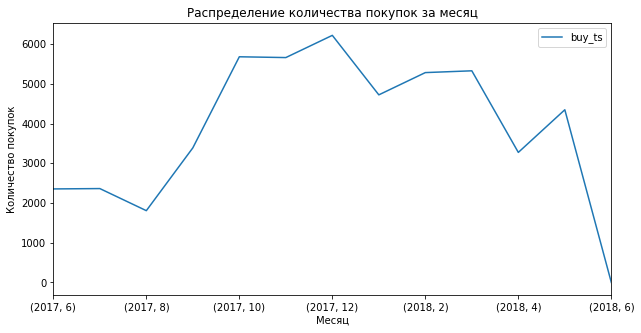

In [62]:
#построим распределение
mean_orders.plot(figsize=(10, 5))

plt.title('Распределение количества покупок за месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество покупок')
plt.show;

Интересно, что в августе 2017 начался резкий подъем — можно узнать что произошло в этот момент, чтобы понять что так увеличило продажи. Заметный подъем с ноября до декабря, затем падение с декабря до января. Сильное падение также есть с марта по апрель. Возможно есть закономерности из-за сезонных причин — праздники, теплое время года.

In [63]:
#в среднем происходит 3878 покупок в месяц
mean_orders['buy_ts'].mean()

3878.076923076923

### Среднее количество покупок за месяц одним пользователем

In [64]:
#сколько в среднем покупает один пользователь за месяц

#сгруппируем данные по году, месяцу и id, чтобы получить количество покупок каждого пользователя в отдельный месяц
mean_user_buy = orders_log.pivot_table(index=['year_buy', 'month_buy', 'uid'], values='buy_ts', aggfunc='count')
mean_user_buy = mean_user_buy.reset_index('uid')
#mean_user_buy['buy_ts'].mode() - чаще всего один пользователь совершает одну покупку в месяц

#полученную таблицу сгруппируем только по году и месяцу, чтобы найти сколько в среднем совершает покупок один пользователь в месяц
mean_user_buy = mean_user_buy.pivot_table(index=['year_buy', 'month_buy'], values='buy_ts', aggfunc='mean')
mean_user_buy

buy_ts
year_buy month_buy          
2017     6          1.163618
         7          1.191028
         8          1.227582
         9          1.231636
         10         1.214759
         11         1.244557
         12         1.258195
2018     1          1.211134
         2          1.240254
         3          1.273858
         4          1.192784
         5          1.226298
         6          1.000000

В среднем один покупатель совершает одну покупку в месяц.

### Какой процент людей совершает больше одной покупки

In [65]:
#найдем общее количество уникальных покупателей
buyers_count = orders_log.pivot_table(index=['year_buy', 'month_buy', 'uid'], values='buy_ts', aggfunc='count')
buyers_count.count()

buy_ts    41019
dtype: int64

In [66]:
#сколько человек совершил разное количество покупок
#В столбце слева — количество покупок, в столбце справа — количество людей, которые совершили столько покупок
buyers_count['buy_ts'].value_counts()

1     36303
2      3511
3       629
4       190
5        92
6        48
7        35
8        30
11       24
9        23
10       16
13       12
12       12
17       11
14       11
18        8
23        7
27        5
20        4
16        4
22        4
25        4
28        4
29        4
35        3
19        3
31        2
30        2
21        2
42        2
40        1
51        1
26        1
33        1
24        1
34        1
49        1
67        1
36        1
15        1
37        1
45        1
39        1
32        1
Name: buy_ts, dtype: int64

Всего за год было 41019 уникальный покупателей. Из них 36303 совершли всего одну покупку — это 88% от общего числа. Значит ли это, что процент повторных покупок очень мал? 

### Комментарий

В среднем в месяц совершается 3878 покупок. При этом, есть пиковые значение в с октября по декабрь, и с февраля по март.

При подсчете по пользователям, мы выяснили, что чаще всего и в среднем один пользователь совершает одну покупку в месяц.

- 88% покупателей совершили всего одну покупку за весь период анализа
- 8% вернулись за второй покупкой
- значит только около 3-4% пользователей совершили больше двух покупок за год

---

### <a id="step8"> Какой средний чек?</a>

Посчитаем средний чек — сумму покупок, деленную на число покупок. Это поможет нам понять как он изменяется с течением времени, он увеличивается или уменьшается.

Для этого: 
- рассчитаем средний чек покупателей в каждый месяц
- найдем порядковый месяц относительно месяца первой покупки

In [67]:
orders_log.head()

,buy_ts,revenue,uid,year_buy,month_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6


In [68]:
#сгруппируем данные по когорте first_order_month и месяцу совершения заказа order_month

#найдем дату первой покупки
first_order_date_by_customers = orders_log.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders_log = orders_log.join(first_order_date_by_customers,on='uid')

#выделим из столбцов first_order_date_by_customers и order_month месяцы
orders_log['first_order_month'] = orders_log['first_order_date'].astype('datetime64[M]')
orders_log['order_month'] = orders_log['buy_ts'].astype('datetime64[M]')

#сгруппируем по месяцу
orders_grouped_by_cohorts = orders_log.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'count'})

#найдём средний чек покупателя revenue_per_user — разделим показатель revenue на uid:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
orders_grouped_by_cohorts.head(10)


revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2354          4.060106
                  2017-07-01    981.82   177          5.547006
                  2017-08-01    885.34   174          5.088161
                  2017-09-01   1931.30   226          8.545575
                  2017-10-01   2068.58   292          7.084178
                  2017-11-01   1487.92   218          6.825321
                  2017-12-01   1922.74   276          6.966449
                  2018-01-01   1176.56   174          6.761839
                  2018-02-01   1119.15   212          5.279009
                  2018-03-01   1225.51   153          8.009869

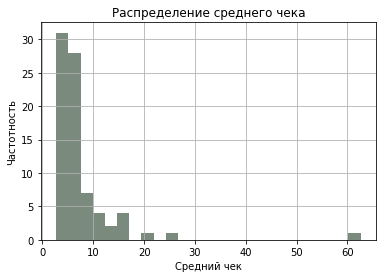

In [69]:
#построим распределние среднего чека
orders_grouped_by_cohorts['revenue_per_user'].plot(kind='hist', bins=25, color='#7A8A7D', grid=True)

plt.title('Распределение среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частотность')

plt.show();

In [70]:
#оставим только значения меньше 30, так как там сосредоточено основное распределние
#так мы получим более точное среднее значение
orders_grouped_by_cohorts[orders_grouped_by_cohorts['revenue_per_user'] < 30]['revenue_per_user'].describe()

count    78.000000
mean      6.944802
std       4.117255
min       2.711282
25%       4.390674
50%       5.623390
75%       7.332243
max      26.084358
Name: revenue_per_user, dtype: float64

### Комментарий

Большинство значение находится до 30, и есть небольшой выброс на отметке 60. Среднее значение равно 6, минимальное 2.7. Построим сводную таблицу, чтобы посмотреть изменения среднего чека.

In [71]:
#построим сводную таблицу изменения среднего чека в когортах по месяцу совершения покупки и оценим, как изменяется средний чек с течением времени:
orders_grouped_by_cohorts_pivot = orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                      columns='order_month',
                                      values='revenue_per_user',
                                      aggfunc='mean')

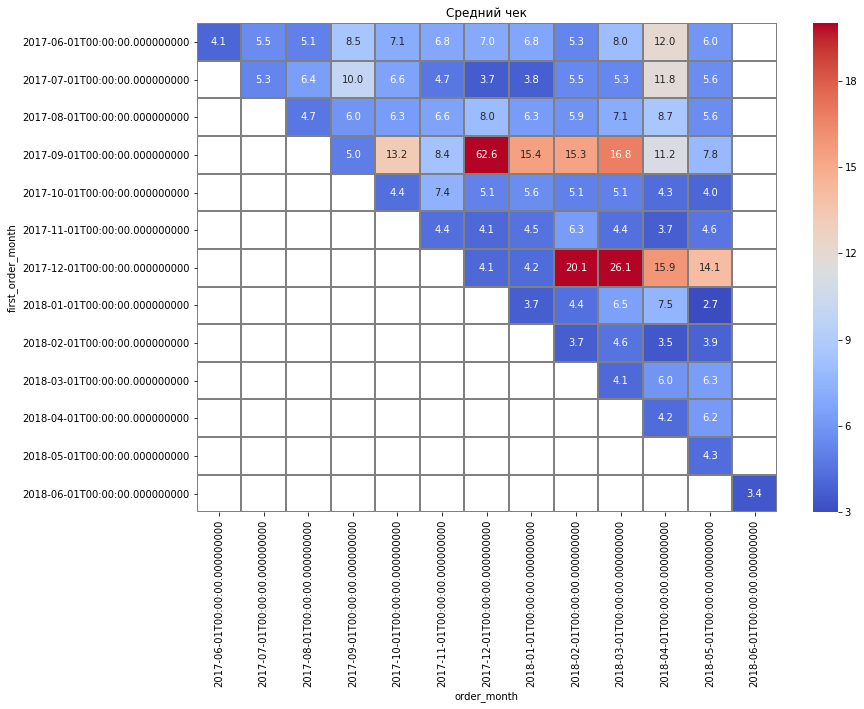

In [72]:
#построим тепловую карту для наглядности
plt.figure(figsize=(13, 9))
plt.title('Средний чек')
sns.heatmap(orders_grouped_by_cohorts_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap= 'coolwarm', vmin=3, vmax=20);

### Комментарий

Большинство значение находится до 30, и есть небольшой выброс на отметке 60. Среднее значение равно 6, минимальное 2.7. Построим сводную табоицу, чтобы посмотреть изменения среднего чека.

Интересно, что если смотреть изменения среднего чека по месяцам, то во второй месяц средний чек всегда увеличивался. При этом почти в каждый следующий месяц средний чек больше, чем первый, кроме одного случая, где в апреле средний чек упал ниже, но мне кажется это скорее исключение. Можно проверить это, и посмотреть что произошло в этом месяце с сайтом — возможно были какие-то нововведения, которые снизили продажи в этом месяце.

---

### <a id="step9"> Сколько денег приносят? (LTV)</a>

Важно учитывать не только одну покупку, но и смотреть остается ли покупатель с нами, поэтому важно смотреть на повторные покупки. В этом нам поможет **LTV** (lifetime value) — «пожизненная» ценность клиента, а именно итоговая сумма, которую компания получает в среднем от одного клиента со всех покупок. Найдем этот показатель.

Чтобы понять хороший ли у нас показатль LTV, нам надо найти CAC (customer acquisition cost) — стоимость привлечения клиента. Экономика одного покупателя сходится, если LTV больше CAC.

In [73]:
#выделим месяцы в таблице с расходами
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].astype('datetime64[M]')

Месяц первой покупки каждого покупателя — orders_log ['first_order_month']

In [74]:
#посчитаем количество новых покупателей за каждый месяц:
cohort_sizes = orders_log.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

In [75]:
#сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа, затем сложим выручку
cohorts = orders_log.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()

Теперь мы знаем какую выручку принесла каждая когорта.

In [76]:
#добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц
report = cohorts.merge(cohort_sizes, on='first_order_month')

In [77]:
#нам не указали какая маржинальность, так что можем предположить, что она составляет 100%
margin_rate = 1

#найдем валовую прибыль, возраст когорты
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

#найдем LTV
report['ltv'] = report['gp'] / report['n_buyers']

#визуализируем когорты в виде сводной таблицы
result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round()

#найдем сумму расходов на маркетинг за каждый месяц и CAC каждой когорты
monthly_costs = costs.groupby('month').sum()
report_new = report.merge(monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']

#создадим сводную таблицу с отчётом, в значениях — накопительный средний ROMI
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output = output.cumsum(axis=1).round(2)

report_new['first_order_month'] = report_new['first_order_month'].dt.strftime('%Y-%m-%d')


#посчитаем LTV средней когорты
final_result = report_new.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')

m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]

Средний LTV за 6 месяцев после первой покупки: 7.96. Примерно такую сумму компания получает в среднем от одного клиента со всех покупок.

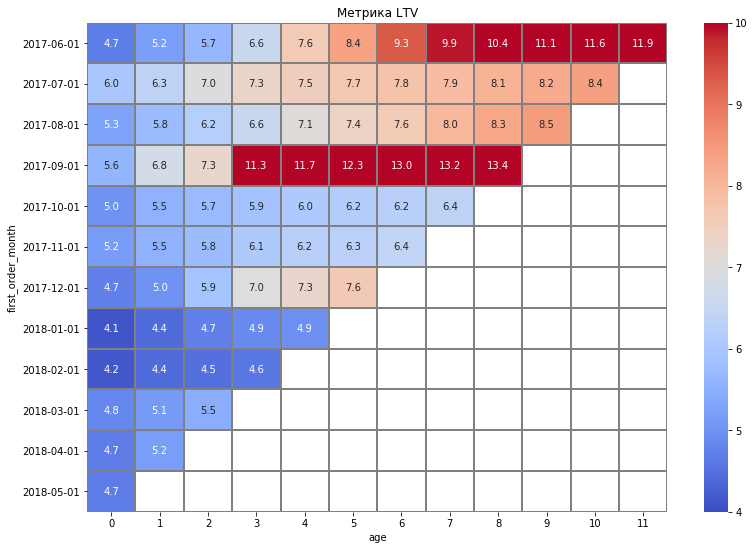

In [78]:
#сделаем метрику накопительной с помощью метода cumsum
final_result = final_result.cumsum(axis=1).round(2)

#построим тепловую карту для метрики LTV
plt.figure(figsize=(13, 9))
plt.title('Метрика LTV')
sns.heatmap(final_result, annot=True, fmt='.1f', linewidths=1, linecolor='gray', 
            cmap= 'coolwarm', vmin=4, vmax=10);

### Комментарий

LTV за первый месяц в более молодых когортах снижается, но в целом такие показатели были и у первой когорты. Также можно отметить, что показатели более молодых когорт медленннее растут с каждым месяцем. Первая когорта в первый месяц имела показатель 4.7, а на шестой месяц уже 8.4. Тогда как например, когорта «2017-11-01» в первый месяц принесла 5.2, а в шестой месяц 6.3. Показатель за первый месяц выше, но с течением времени рост более медленный.

У когорты «2017-09-01» произошел резкий рост на четвертый месяц. Последние показатели одни из самых высоких — стоит проверить почему такое могло произойти.


## Промежуточный вывод

По продажам у нас было четыре вопроса:

### **Когда люди начинают покупать?**

По частоте время распределено так:
1. 2656 покупок были совершены за одну минуту (если эти данные достоверны)
2. 2098 покупок были совершены за две минуты от первого посещения
3. 1685 покупок были совершены за минуты минуты от первого посещения

На распределение видно, что большая часть покупой была совершена в диапазоне от 0 до 300 минут, при чем пиковые значения от 0 до 40 минут. Пик от 0 до 20 минут.

- 22582 покупки из 36523 были совершены в течение часа, а это больше 60% покупок.
- 10156 покупок из 36523 были совершены больше, чем через 24 часа, а это больше 27% покупок.
- максимальное время — 8719 часов

### **Сколько раз покупают за период?**

В среднем в месяц совершается 3878 покупок. Чаще всего и в среднем один пользователь совершает одну покупку в месяц.

88% покупателей совершили всего одну покупку за весь период анализа
8% вернулись за второй покупкой
значит только около 3-4% пользователей совершили больше двух покупок за год

### **Какой средний чек?**

Большинство значение находится до 30, и есть небольшой выброс на отметке 60. Среднее значение равно 6, минимальное 2.7. Построим сводную табоицу, чтобы посмотреть изменения среднего чека.

### **Сколько денег приносят? (LTV)**

Средний LTV за 6 месяцев после первой покупки: 7.96. Примерно такую сумму компания получает в среднем от одного клиента со всех покупок.

LTV за первый месяц в более молодых когортах снижается, но в целом такие показатели были и у первой когорты. Также можно отметить, что показатели более молодых когорт медленннее растут с каждым месяцем. Первая когорта в первый месяц имела показатель 4.7, а на шестой месяц уже 8.4. Тогда как например, когорта «2017-11-01» в первый месяц принесла 5.2, а в шестой месяц 6.3. Показатель за первый месяц выше, но с течением времени рост более медленный.

У когорты «2017-09-01» произошел резкий рост на четвертый месяц. Последние показатели одни из самых высоких — стоит проверить почему такое могло произойти.

---

# <a id="five"> Анализ данных о затратах на маркетинг</a>

### Оглавление части

1. [Сколько денег потратили? Всего / на каждый источник / по времени](#step10) </n>
2. [Сколько стоило привлечение одного покупателя из каждого источника?](#step11)
3. [На сколько окупились расходы? (ROI)](#step12)

Проанализируем данные о затратах на маркетинг и ответим на вопросы:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько стоило привлечение одного покупателя из каждого источника?
- На сколько окупились расходы? (ROI)

### <a id="step10"> Сколько денег потратили? Всего / на каждый источник / по времени</a>

У нас есть таблица, где указано количество затрат на маркетинг для разных рекламных источников (они указаны в столбце source_id). В таблице их всего семь. 

Сначала найдем сколько денег было потрачено в целом, а после в разбивке по источника и по времени.

In [79]:
costs.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [80]:
costs['costs'].sum()

329131.62

Всего с июня 2017 по конец мая 2018 года было потрачено на маркетинг: **329131**

### Потрачено денег в разбивке по источникам

,costs
source_id,
3,141321.63
4,61073.60
5,51757.10
2,42806.04
1,20833.27
10,5822.49
9,5517.49


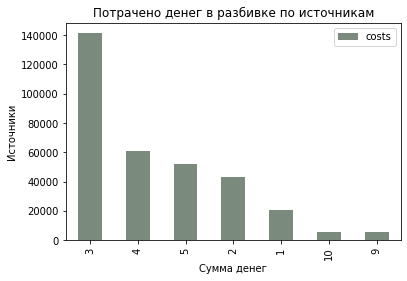

In [81]:
#сделаем сводную таблицу по источникам
source_costs = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')

#отсортируем данные и построим график
display(source_costs.sort_values(by='costs', ascending=False))
(source_costs
 .sort_values(by='costs', ascending=False)
 .plot(kind='bar', color='#7A8A7D')
)
 
plt.title('Потрачено денег в разбивке по источникам')
plt.xlabel('Сумма денег')
plt.ylabel('Источники')
plt.show();

Наиболее дорогой истоник номер 3, после идут источники 4 и 5. Посмотрим сколько человек пришло из каждого источника. В таблице visits есть столбец, где указан идентификатор рекламного источника, из которого пришел пользователь.

In [82]:
#оставим только нужные столбцы
visits_sourch = visits_log[['device', 'source_id','session_duration', 'end_ts', 'start_ts', 'uid', 
       'first_session_date', 'first_session_month', 'session_month']]

visits_sourch.head()

,device,source_id,session_duration,end_ts,start_ts,uid,first_session_date,first_session_month,session_month
0,touch,4,1080.0,2017-12-20 17:38:00,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2,1680.0,2018-02-19 17:21:00,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,5,0.0,2017-07-01 01:54:00,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,9,1440.0,2018-05-20 11:23:00,2018-05-20 10:59:00,16174680259334210214,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,3,0.0,2017-12-27 14:06:00,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-01,2017-12-01


,start_ts
source_id,
4,101794
3,85610
5,66905
2,47626
1,34121
9,13277
10,10025
7,36
6,6


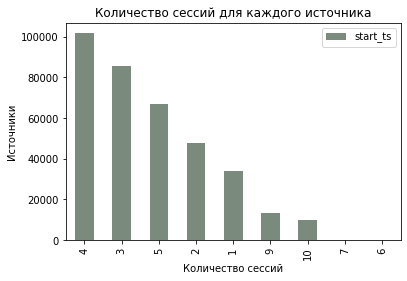

In [83]:
#посчитаем сколько было сессий для каждого источника
visits_sourch_counts = visits_sourch.pivot_table(index='source_id', values='start_ts', aggfunc='count')

display(visits_sourch_counts.sort_values(by='start_ts', ascending=False))
(visits_sourch_counts
 .sort_values(by='start_ts', ascending=False)
 .plot(kind='bar', color='#7A8A7D')
)
 
plt.title('Количество сессий для каждого источника')
plt.xlabel('Количество сессий')
plt.ylabel('Источники')
plt.show();


### Комментарий

Уже можно отметить, что источники под номером 3 и 4 приводят больше всего пользователей. 

Также в таблице есть два источника, в которые маркетинг не вкладывает деньги, но оттуда тоже приходят небольшое количество пользователей. Возможно нужно обратить на них внимание или повысить органический трафик без вложений.

По остальным источникам показатели закономерны относительно вкладываемых денег.

### Показатели в разбивке по устройствам

Посмотрим отличаются ли показатели на разных устройствах — возможно какие-то источники лучше работают для компьютера, а какие-то для мобильных устройств.

In [84]:
#разделим данные по устройству
visits_sourch_desktop = visits_sourch.query('device == "desktop"').pivot_table(index='source_id', 
                                                                        values='start_ts', aggfunc='count')

visits_sourch_touch = visits_sourch.query('device == "touch"').pivot_table(index='source_id', 
                                                                        values='start_ts', aggfunc='count')

In [85]:
#объединим две таблицы для наглядности
visits_sourc_by_devices = pd.concat([visits_sourch_desktop, visits_sourch_touch], axis=1)
visits_sourc_by_devices.columns = ['start_ts_desktop', 'start_ts_touch']

visits_sourc_by_devices = visits_sourc_by_devices.sort_values(by='start_ts_desktop', ascending=False)

visits_sourc_by_devices['procent'] = (visits_sourc_by_devices['start_ts_touch']
                                      /visits_sourc_by_devices['start_ts_desktop'])*100

visits_sourc_by_devices

,start_ts_desktop,start_ts_touch,procent
source_id,,,
4,67640,34154,50.493791
3,65777,19833,30.151877
5,50069,16836,33.625597
2,35661,11965,33.552060
1,25901,8220,31.736226
9,10119,3158,31.208617
10,7367,2658,36.079815
7,28,8,28.571429
6,5,1,20.000000


### Комментарий

Разницы между источниками мы не обнаружили, но заметили, что с компьютера ресурсом пользуются почти в два раза больше. Справа появился столбцец, где в процентах указано отношение одного источника к другому по посещениям. Например, по 4 источнику на компьютерах посещений на 50 процентов больше, а по источнику 3 на 30 процентов больше.

---

### Потрачено денег в разбивке по месяцам

Сначала посмотрим сколько было потрачено в каждый месяц, а потом в разбивке по источникам.

,costs
month,
2017-06-01,18015.00
2017-07-01,18240.59
2017-08-01,14790.54
2017-09-01,24368.91
2017-10-01,36322.88
2017-11-01,37907.88
2017-12-01,38315.35
2018-01-01,33518.52
2018-02-01,32723.03


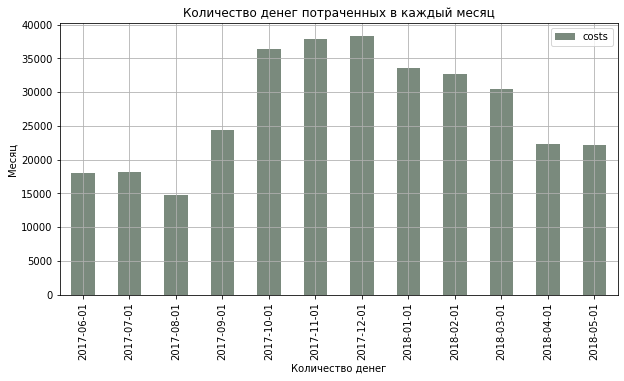

In [86]:
#сократим даты на графике
costs['month'] = costs['month'].dt.strftime('%Y-%m-%d')

costs_month = costs.pivot_table(index='month', values='costs', aggfunc='sum')

display(costs_month)
costs_month.plot(kind='bar', color='#7A8A7D', grid=True, figsize=(10, 5))

plt.title('Количество денег потраченных в каждый месяц')
plt.xlabel('Количество денег')
plt.ylabel('Месяц')
plt.show();

### Комментарий

Затраты заметно начали расти с сентября 2019 года и снижаться в январе 2018. Возможно затраты были увеличины в связи с введением нового продукта или чтобы поднять посещаемость. Проверим это по визитам.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,start_ts
session_month,
2017-06-01,16505
2017-07-01,17828
2017-08-01,14355
2017-09-01,23907
2017-10-01,37903
2017-11-01,43969
2017-12-01,41983
2018-01-01,36939
2018-02-01,37182


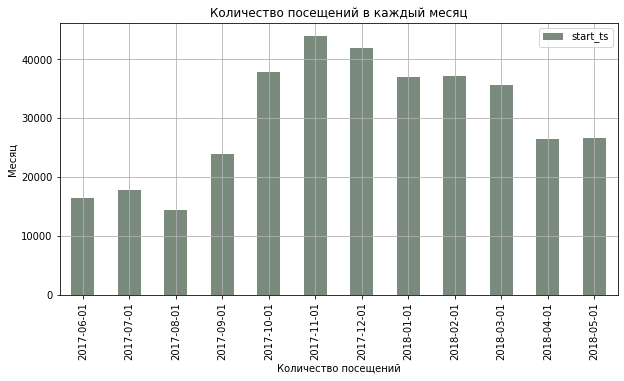

In [87]:
#сократим даты на графике
visits_sourch['session_month'] = visits_sourch['session_month'].dt.strftime('%Y-%m-%d')

visits_month = visits_sourch.pivot_table(index='session_month', values='start_ts', aggfunc='count')

display(visits_month)
visits_month.plot(kind='bar', color='#7A8A7D', grid=True, figsize=(10, 5))

plt.title('Количество посещений в каждый месяц')
plt.xlabel('Количество посещений')
plt.ylabel('Месяц')
plt.show();

### Комментарий

В августе 2017 показатели были действительно ниже, чем в июне и июле, а с сентября они резко начали расти и достигли 40 тысяч сессий в месяц.

---

### <a id="step11"> Сколько стоило привлечение одного покупателя из каждого источника?</a>

Для того, чтобы посчитать этот показатель, используем данных из двух таблиц. Мы сгруппируем данные по источнику и посчитаем показатель в отдельном столбце.

In [88]:
#посчитаем сколько было потрачено на каждый источник
total_sourch_costs = costs.pivot_table(index='source_id', values='costs', aggfunc='sum')
total_sourch_costs

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


In [89]:
#получим источник для пользователя по визитам
visits_sourch_uid = visits_log[['uid', 'source_id']]

#присоединим источник к заказам по пользователям
uid_orders_sourch = orders_log.merge(visits_sourch_uid, on='uid')

#оставим только нужные столбцы и сделаем сводную таблицу по источникам
uid_orders_sourch = uid_orders_sourch[['source_id', 'uid', 'order_month']]
orders_users_sourch_pivot = uid_orders_sourch.pivot_table(index='source_id', values='uid', aggfunc='nunique')
orders_users_sourch_pivot

,source_id,uid
source_id,,
1,1,7138
2,1,7305
3,1,13846
4,1,14253
5,1,10156
7,1,1
9,1,2793
10,1,1773


In [90]:
#объединим таблицы и посчитаем стоимость одного пользователя из каждого источника
final_sourch_cost_data = orders_users_sourch_pivot.join(total_sourch_costs)
final_sourch_cost_data['user_cost'] = final_sourch_cost_data['costs']/final_sourch_cost_data['uid']
final_sourch_cost_data

,source_id,uid,costs,user_cost
source_id,,,,
1,1,7138,20833.27,2.918642
2,1,7305,42806.04,5.859828
3,1,13846,141321.63,10.206676
4,1,14253,61073.60,4.284965
5,1,10156,51757.10,5.096209
7,1,1,NaN,NaN
9,1,2793,5517.49,1.975471
10,1,1773,5822.49,3.283976


### Комментарий

Самая высокая стоимость привлечения пользователя у источника 3 — 10.2, но и показатели по нему довольно высокие, хотя из источника номер 4 приходят больше пользователей, а стоимость одного привлеченного пользователя здесь — 4.28. На третьем место по количеству пришедших пользователей источник номер 5, и стоимость здесь — 5.09.

Получается, что среди трех лидирующих источников, 4 наиболее выгодный. Он дешевле, чем источники 2, 3 и 5 но приводит больше пользователей.

---

### <a id="step12"> На сколько окупились расходы? (ROI)</a>

Метрика ROI можно перевести как «возврат на инвестиции» — она помогает понять как скоро окупятся вложенные инвестиции. В нашем случае нужно выяснить окупились ли деньги, которые были вложены в привлечение покупателей.

У нас есть столбец costs, где указаны затраты на каждый рекламный источник за день. Используем эти данные для рассчета.

Для рассчета окупаемости маркетинга, вместо ROI рассчитывают ROMI.

In [91]:
#сделаем таблицу с затратами на маркетинг по месяцам
costs_pivot = costs.pivot_table(index='month', values='costs', aggfunc='sum')

#найдем таблицу прибылью по месяцам
orders_revenue = orders_log[['buy_ts', 'revenue', 'first_order_date','first_order_month', 'order_month']]
orders_revenue = orders_revenue.pivot_table(index='order_month', values='revenue', aggfunc='sum')

In [92]:
#объединим таблицы и найдем выручку
proceeds = costs_pivot.join(orders_revenue)
proceeds.columns = ['costs_marketing', 'buy_revenue']
proceeds['proceeds'] = ((proceeds['buy_revenue'] - proceeds['costs_marketing'])/proceeds['costs_marketing'])*100
proceeds

,costs_marketing,buy_revenue,proceeds
month,,,
2017-06-01,18015.00,9557.49,-46.947044
2017-07-01,18240.59,12539.47,-31.255129
2017-08-01,14790.54,8758.78,-40.781202
2017-09-01,24368.91,18345.51,-24.717560
2017-10-01,36322.88,27987.70,-22.947465
2017-11-01,37907.88,27069.93,-28.590230
2017-12-01,38315.35,36388.60,-5.028663
2018-01-01,33518.52,19417.13,-42.070443
2018-02-01,32723.03,25560.54,-21.888224


Сейчас мы видим убытки в течение всего года.

In [93]:
#посчитаем общую сумму дохода за год
proceeds['buy_revenue'].sum()

252053.77999999846

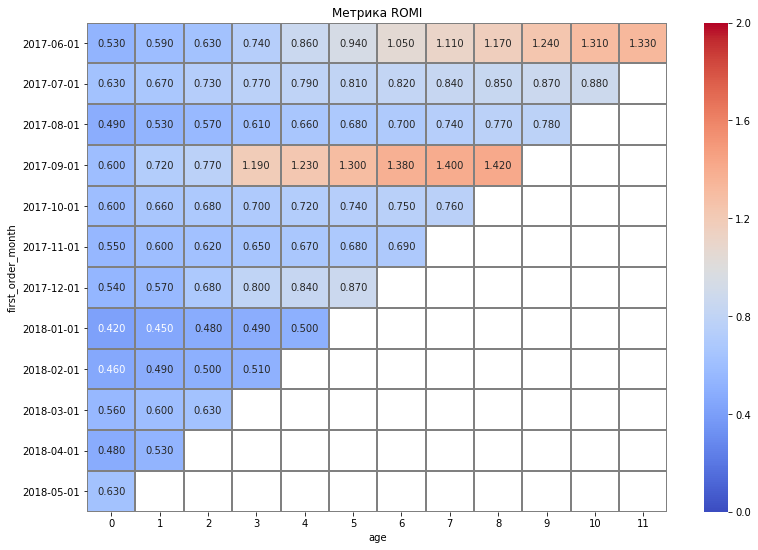

In [94]:
#создадим сводную таблицу и посчитаем ROMI
#для этого поделим LTV на CAC
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

#чтобы посчитать накопительный ROMI, вызовем метод cumsum()
output = output.cumsum(axis=1).round(2)

#построим тепловую карту для метрики ROMI
plt.figure(figsize=(13, 9))
plt.title('Метрика ROMI')
sns.heatmap(output, annot=True, fmt='.3f', linewidths=1, linecolor='gray', 
            cmap= 'coolwarm', vmin=0, vmax=2);

### Комментарий

В таблице видно, что на маркетинг тратилось в разы больше денег, чем приносили компании покупки — ни в одном месяце компания не получила прибыль, а даже скорее получала убытки.

ROMI мы можем проанализировать по тепловой карте. 
Когорта за июнь 2017 окупилась на 7 месяц (ROMI = 1.11). Когорты за июль и август еще не окупились, а вот сентябрьская окупилась на 4 месяц (ROMI = 1.19). Остальные когорты пока не окупились.

Всего 2 когорты окупились за весь период жизни.

## Промежуточный вывод

Нам было нужно ответить на три вопроса:
- **Сколько денег потратили? Всего / на каждый источник / по времени**

Всего с июня 2017 по конец мая 2018 года было потрачено на маркетинг: 329131. При этом прибыль за год составила 252053.

Наиболее дорогой источник номер 3, после идут источники 4 и 5. Уже можно отметить, что источники под номером 3 и 4 приводят больше всего пользователей. 

Затраты заметно начали расти с сентября 2019 года и снижаться в январе 2018. 

- **Сколько стоило привлечение одного покупателя из каждого источника?**

Самая высокая стоимость привлечения пользователя у источника 3 — 10.2, но и показатели по нему довольно высокие, хотя из источника номер 4 приходят больше пользователей, а стоимость одного привлеченного пользователя здесь — 4.28. На третьем место по количеству пришедших пользователей источник номер 5, и стоимость здесь — 5.09.

Получается, что среди трех лидирующих источников, 4 наиболее выгодный. Он дешевле, чем источники 2, 3 и 5 но приводит больше пользователей.

- **На сколько окупились расходы? (ROI)**

В таблице видно, что на маркетинг тратилось в разы больше денег, чем приносили компании покупки — ни в одном месяце компания не получила прибыль, а даже скорее получала убытки.

ROMI мы можем проанализировать по тепловой карте. Когорта за июнь 2017 окупилась на 7 месяц (ROMI = 1.11). Когорты за июль и август еще не окупились, а вот сентябрьская окупилась на 4 месяц (ROMI = 1.19). Остальные когорты пока не окупились.

---

# <a id="six">Итоговый вывод</a>

### Цель проекта

Целью проекта было изучить взаимодействие пользователя с нашим продуктом и оптимизировать маркетинговые затраты.

#### Как люди пользуются продуктом?

В среднем:

- в месяц заходят 23228 уникальных пользователей
- в неделю 5716 уникальных пользователей
- в день 911 уникальных пользователей

Sticky factor (регулярность использования ресурса):

- по отношению к месячной аудитории — 3.9
- по отношению к недельной аудитории — 15.9


- В январе количество пользователей около 28 тысяч, но количество значительно **снижается до июля и держится на низких показателях все лето. С сентября количество пользователей растет.** Вероятно это сезонные изменения, хотя казалось, что летом люди должны больше интересоваться событиями в городе. Возможно это связано с тем, что летом многие уезжают на отдых из страны.
- Процент возвратившихся пользователей довольно мал — **меньше 10 процентов пользователей возвращаются на сайт повторно**. Возможно это потому, что сайтом пользуются для конкретных задач — заказать билеты, а стабильно к нему возвращается небольшое количество людей. Со временем процент снижается, но при этом показатель довольно стабильный в первые месяцы в одной когорте.

#### Сессии

- **Среднее количество сессий — 987**, но при этом есть минимальное количество 1 и максимально 3510. Было бы неплохо посмотреть как они распределены. Количество сессий уменьшается с января и начинает расти в сентябре, также как и количество посетителей. Вероятно это естественные сезонные изменения.

- Длительность средней сессии 714 секунд, около 12 минут — это неплохой показатель, но посмотрим на распределение.


#### Когда они начинают покупать?

По частоте время распределено так:
1. 2656 покупок были совершены за одну минуту (если эти данные достоверны)
2. 2098 покупок были совершены за две минуты от первого посещения
3. 1685 покупок были совершены за минуты минуты от первого посещения

На распределение видно, что большая часть покупой была совершена в диапазоне от 0 до 300 минут, при чем пиковые значения от 0 до 40 минут. Пик от 0 до 20 минут.


- 22582 покупки из 36523 были совершены в течение часа, а это больше 60% покупок.
- 10156 покупок из 36523 были совершены больше, чем через 24 часа, а это больше 27% покупок.
- максимальное время — 8719 часов

- Значит, 60% пользователей покупают в течение часа, при этом 24593 значений расположены в диапазоне от 0 до 300 минут. Значит большинство совершает покупку после первого посещения не позже, чем через 6 часов.


В среднем один покупатель совершает одну покупку в месяц.


- В августе 2017 начался резкий подъем продаж — можно узнать что произошло в этот момент, чтобы понять что так увеличило продажи. Заметный подъем с ноября до декабря, затем падение с декабря до января. Сильное падение также есть с марта по апрель. Возможно есть закономерности из-за сезонных причин — праздники, теплое время года.


- Всего за год было 41019 уникальный покупателей. Из них 36303 совершили всего одну покупку — это 88% от общего числа. Значит ли это, что процент повторных покупок очень мал?

#### Сколько денег приносит каждый клиент?

- В среднем в месяц совершается 3878 покупок. При этом, есть пиковые значение в с октября по декабрь, и с февраля по март.


- 88% покупателей совершили всего одну покупку за весь период анализа
- 8% вернулись за второй покупкой
- значит только около 3-4% пользователей совершили больше двух покупок за год


- Cредний чек равен 13, при этом большая часть значений распределена от 3 до 10.


- Средний LTV за 6 месяцев после первой покупки: 7.96. Примерно такую сумму компания получает в среднем от одного клиента со всех покупок.

- LTV за первый месяц в более молодых когортах снижается, но в целом такие показатели были и у первой когорты. Также можно отметить, что показатели более молодых когорт медленннее растут с каждым месяцем. Первая когорта в первый месяц имела показатель 4.7, а на шестой месяц уже 8.4. Тогда как например, когорта «2017-11-01» в первый месяц принесла 5.2, а в шестой месяц 6.3. Показатель за первый месяц выше, но с течением времени рост более медленный.


#### Когда клиент окупается?

- **Сколько денег потратила компания?**

Всего с июня 2017 по конец мая 2018 года было потрачено на маркетинг: 329131. При этом прибыль за год составила 252053.

Наиболее дорогой источник номер 3, после идут источники 4 и 5. Источники под номером 3 и 4 приводят больше всего пользователей.

Затраты заметно начали расти с сентября 2019 года и снижаться в январе 2018.

- **Сколько стоило привлечение одного покупателя из каждого источника?**

Самая высокая стоимость привлечения пользователя у источника 3 — 10.2, но и показатели по нему довольно высокие, хотя из источника номер 4 приходят больше пользователей, а стоимость одного привлеченного пользователя здесь — 4.28. На третьем место по количеству пришедших пользователей источник номер 5, и стоимость здесь — 5.09.

- **На сколько окупились расходы? (ROI)**

В таблице видно, что на маркетинг тратилось в разы больше денег, чем приносили компании покупки — ни в одном месяце компания не получила прибыль, а даже скорее получала убытки.

ROMI мы можем проанализировать по тепловой карте. Когорта за июнь 2017 окупилась на 7 месяц (ROMI = 1.11). Когорты за июль и август еще не окупились, а вот сентябрьская окупилась на 4 месяц (ROMI = 1.19). Остальные когорты пока не окупились.

----

### Общие замечания

- На компьютерах сайт просматривают в среднем дольше, чем с мобильной версии.

- Всего с июня 2017 по конец мая 2018 года было потрачено на маркетинг: 329131

- По данным можно сказать, что после первого посещения пользователь отмечает для себя, что на этом сайте можно заказать билеты, но при этом он не возвращается к нему без конкретной цели покупки. 

- Интересно, что если смотреть изменения среднего чека по месяцам, то во второй месяц средний чек всегда увеличивался. При этом почти в каждый следующий месяц средний чек больше, чем первый, кроме одного случая, где в апреле средний чек упал ниже, но мне кажется это скорее исключение. Можно проверить это, и посмотреть что произошло в этом месяце с сайтом — возможно были какие-то нововведения, которые снизили продажи в этом месяце.

-----

### Ошибки в данных

- Основная проблема с типами данных: столбцы с датами не имеют тип datetime.


- 2455 покупок были совершены в первую же секунду посещения — это не очень похоже на правдивый результат, так что возможно это просто ошибка в данных. Нужно проверить.

-----

### Рекомендации

- За 6 месяцев коэффициент удержания упал на 2,3% (это примерно 30% общего числа). Поведение пользователей меняется с каждой новой когортой. Возможно стоит разобраться в чем могла быть причины — возможно выбраны неэффективные источники трафика или изменился интерфейс.

- Также я бы посоветовала коллегам изучить данные и попробовать изменить стратегию, чтобы увеличить количество повторных посещений.
- Меньше 10% пользователей возвращаются к ресурсу после первого посещения. Значит пользователь редко приходит на сайт для того, чтобы просто ознакомиться с новостями и не обращается к сайту как к периодическому изданию. Возможно стоит улучшить этот показатель, так как постоянные читатели могут чаще пользоваться прямым продуктом — покупкой билетов.
- Получается, что среди трех лидирующих источников, 4 наиболее выгодный. Он дешевле, чем источники 2, 3 и 5 но приводит больше пользователей. Возможно стоит больше сосредоточиться на нем.
- У когорты «2017-09-01» произошел резкий рост LTV на четвертый месяц. Последние показатели одни из самых высоких — стоит проверить почему такое могло произойти.